In [126]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 

## Load Data

In [2]:
paysim_data = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/paysim_financial_data/PS_20174392719_1491204439457_log.csv')

In [3]:
paysim_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Data Dictionary

| Column  | Description  | 
| --- | ---|
| step  | Maps a unit of time in the real world. In this case 1 step is 1 hour of time.  | 
| type   |  CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER  | 
| amount  |  amount of the transaction in local currency  | 
| nameOrig  |  customer who started the transaction  |
| oldbalanceOrg  |   initial balance before the transaction  | 
| newbalanceOrig  |  newbalanceOrig  | 
| nameDest  |  recipient ID of the transaction  | 
| oldbalanceDest  |   initial recipient balance before the transaction.  | 
| newbalanceDest  |  recipient's balance after the transaction.  |
| isFraud   |  identifies a fraudulent transaction (1) and non fraudulent (0)  |
| isFlaggedFraud |  flags illegal attempts to transfer more than 200.000 in a single transaction.  |

## Basic Inspection

In [4]:
paysim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
paysim_data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Fraud

In [6]:
## in both isFraud & isFlaggedFraud, 1 = yes, 0 = no

In [7]:
paysim_data['isFraud'].sum()

8213

In [8]:
paysim_data['isFlaggedFraud'].sum()

16

In [9]:
paysim_data[['type', 'isFraud', 'isFlaggedFraud']]

,type,isFraud,isFlaggedFraud
0,PAYMENT,0,0
1,PAYMENT,0,0
2,TRANSFER,1,0
3,CASH_OUT,1,0
4,PAYMENT,0,0
...,...,...,...
6362615,CASH_OUT,1,0
6362616,TRANSFER,1,0
6362617,CASH_OUT,1,0
6362618,TRANSFER,1,0


In [14]:
fraud_type = paysim_data[['type', 'isFraud', 'isFlaggedFraud']]

In [16]:
fraud_type.groupby(['type']).value_counts()

type      isFraud  isFlaggedFraud
CASH_IN   0        0                 1399284
CASH_OUT  0        0                 2233384
          1        0                    4116
DEBIT     0        0                   41432
PAYMENT   0        0                 2151495
TRANSFER  0        0                  528812
          1        0                    4081
                   1                      16
dtype: int64

In [17]:
fraud_type.groupby(['type']).sum()

,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


In [25]:
fraud_flags.to_csv('/Users/marcolaureano2/Documents/GitHub/paysim_financial_data/fraud_flags.csv')

## Fraud Transactions

In [19]:
fraud_transactions = paysim_data.loc[paysim_data['isFraud'] == 1]
fraud_transactions

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [26]:
fraud_transactions.to_csv('/Users/marcolaureano2/Documents/GitHub/paysim_financial_data/fraud_transactions.csv')

In [31]:
fraud_transactions['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [36]:
cashout_fraud = fraud_transactions.loc[fraud_transactions['type'] == 'CASH_OUT']
cashout_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [38]:
cashout_fraud.to_csv('/Users/marcolaureano2/Documents/GitHub/paysim_financial_data/cashout_fraud.csv')

In [37]:
transfer_fraud = fraud_transactions.loc[fraud_transactions['type'] == 'TRANSFER']
transfer_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [39]:
transfer_fraud.to_csv('/Users/marcolaureano2/Documents/GitHub/paysim_financial_data/transfer_fraud.csv')

## Fraud Flags

In [27]:
fraud_flags = paysim_data.loc[paysim_data['isFlaggedFraud'] == 1]
fraud_flags

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [32]:
fraud_flags['type'].value_counts()

TRANSFER    16
Name: type, dtype: int64

In [41]:
## every transaction flagged as fraud appears to really be fraud but not every fraud transaction was flagged

In [45]:
16 / 8213 * 100

0.1948131011810544

In [52]:
num_total_transactions = len(paysim_data)
num_fraud_transactions = len(fraud_transactions)
num_fraud_flags = len(fraud_flags)

fraud_percent = (num_fraud_transactions / num_total_transactions) * 100
flag_percent = (num_fraud_flags / num_total_transactions) * 100

print(f'Percent of fraud flags: {flag_percent:4%}')
print(f'Percentage of fraudulant transactions: {fraud_percent:4f}%')

Percent of fraud flags: 0.025147%
Percentage of fraudulant transactions: 0.129082%


In [53]:
num_fraud_transactions

8213

In [54]:
num_total_transactions

6362620

In [55]:
num_fraud_flags

16

In [61]:
fraud_percent

0.12908204481801522

In [75]:
total_transactions = len(paysim_data)
fraud_count = paysim_data['isFraud'].sum()
flag_count = paysim_data['isFlaggedFraud'].sum()

percent_fraud = (fraud_count / total_transactions) * 100
percent_flag = (flag_count / total_transactions) * 100

In [122]:
def analyze_fraud_stats():
    total_transactions = len(paysim_data)
    fraud_count = paysim_data['isFraud'].sum()
    flag_count = paysim_data['isFlaggedFraud'].sum()

    percent_fraud = (fraud_count / total_transactions) * 100
    percent_flag = (flag_count / total_transactions) * 100
    
    print(f'Percent of fraud flags: {percent_fraud:4%}')
    print(f'Percentage of fraudulant transactions: {percent_flag:4f}%')
   
    return


In [123]:
analyze_fraud_stats()

Percent of fraud flags: 12.908204%
Percentage of fraudulant transactions: 0.000251%


In [140]:
def plot_fraud_stats(): 
    labels = ['Flagged as Fraud', 'Actual Fraud']
    values = [percent_flag, percent_fraud]
    
    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, values, color=['orange', 'red'])

    # Add data labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
                 f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.ylabel('Percentage')
    plt.title('Comparison of Fraud Flags vs Actual Fraud')
    plt.ylim(0, max(values) + 5)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    return


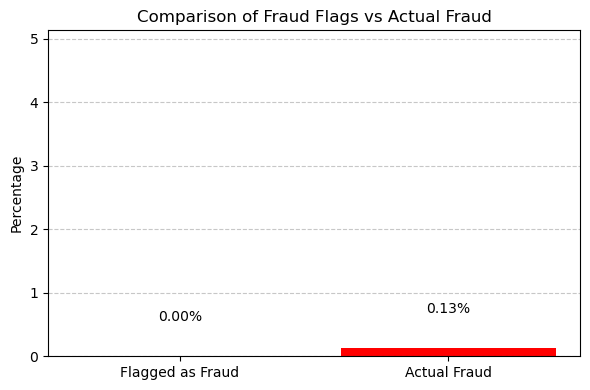

In [141]:
plot_fraud_stats()

In [142]:
def plot_fraud_stats_pie(): 
    labels = ['Flagged as Fraud', 'Actual Fraud']
    sizes = [percent_flag, percent_fraud]
    colors = ['orange', 'red']

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%',
            startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title('Fraud Flags vs Actual Fraud')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()

    return

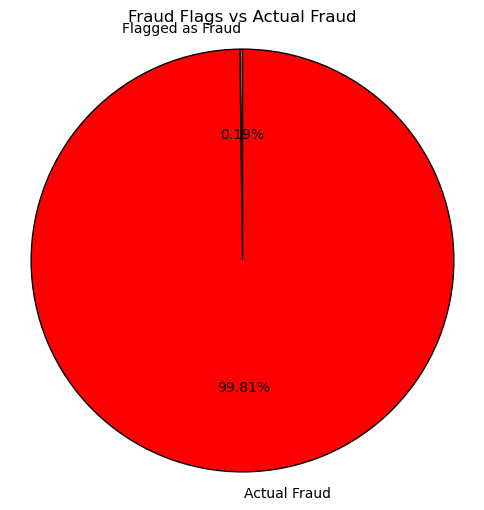

In [143]:
plot_fraud_stats_pie()